In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv('./data/1429_1.csv')
df2 = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
df3 = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

print(df3.columns)
print(df1.columns)
print(df2.columns)

C:\Users\srmpc\AppData\Local\Temp\ipykernel_8936\3370133951.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('./data/1429_1.csv')


Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',

In [ ]:
common_cols = [
    'id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
    'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
    'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
    'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
    'reviews.text', 'reviews.title', 'reviews.username'
]

In [8]:
df2.rename(columns={
    'dataAdded' : 'reviews.dataAdded',
    'sourceURLs' : 'reviews.sourceURLs'
}, inplace=True)

In [7]:
df3.rename(columns={
    'dataAdded' : 'reviews.dataAdded',
    'sourceURLs' : 'reviews.sourceURLs'
}, inplace=True)

In [10]:
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)

In [15]:
print(df3.columns[df3.columns.duplicated()])

Index(['reviews.sourceURLs'], dtype='object')


In [16]:
df1 = df1.loc[:, ~df1.columns.duplicated()]
df2 = df2.loc[:, ~df2.columns.duplicated()]
df3 = df3.loc[:, ~df3.columns.duplicated()]

In [17]:
merged = pd.concat([df1, df2, df3], ignore_index=True)

In [18]:
merged.drop_duplicates(inplace = True)

In [19]:
merged['reviews.rating'] = pd.to_numeric(merged['reviews.rating'], errors='coerce')

In [20]:
merged['reviews.text'] = merged['reviews.text'].astype(str)

In [22]:
#
merged[['reviews.rating', 'reviews.text']].head()
merged[['reviews.rating', 'reviews.text']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 67897 entries, 0 to 67991
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  67864 non-null  float64
 1   reviews.text    67897 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [23]:
merged.isnull().sum()

merged = merged.dropna(subset=['reviews.text','reviews.rating'])

In [24]:
avg_rating = merged.groupby('id')['reviews.rating'].mean().sort_values(ascending=False)
avg_rating.head()

id
AV-XeQLWuC1rwyj_gbP5    5.0
AVpe5Q3sLJeJML43xt5X    5.0
AVpfhcniLJeJML43-t4G    5.0
AVpff7_VilAPnD_xc1E_    5.0
AWdDlIX9Hh53nbDRSc-U    5.0
Name: reviews.rating, dtype: float64

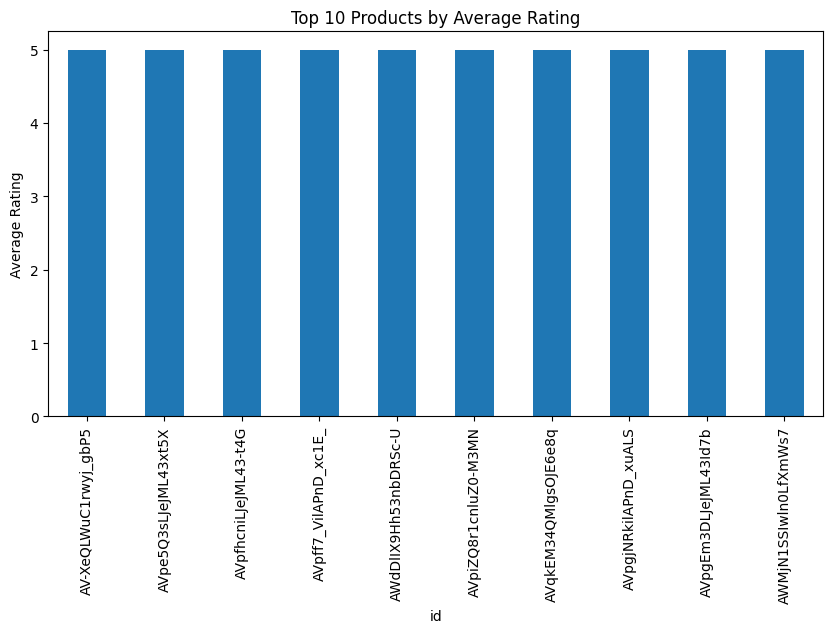

In [27]:
top10 = avg_rating.head(10)

top10.plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 Products by Average Rating")
plt.ylabel("Average Rating")
plt.show()

In [28]:
merged['sentiment_length'] = merged['reviews.text'].str.len()
merged[['reviews.text', 'sentiment_length']].head()

,reviews.text,sentiment_length
0,This product so far has not disappointed. My c...,143
1,great for beginner or experienced person. Boug...,75
2,Inexpensive tablet for him to use and learn on...,131
3,I've had my Fire HD 8 two weeks now and I love...,593
4,I bought this for my grand daughter when she c...,613


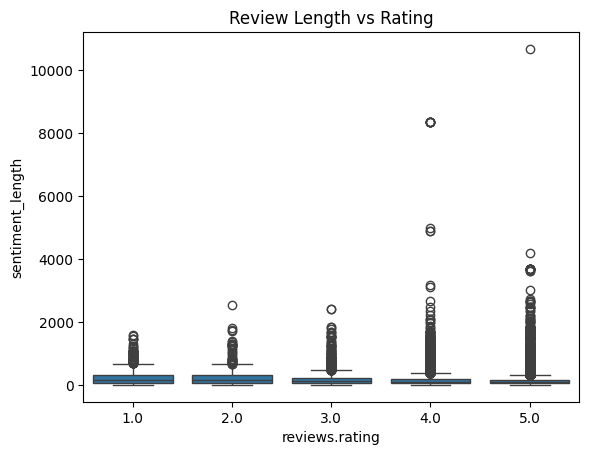

In [29]:
sns.boxplot(x='reviews.rating', y='sentiment_length', data=merged)
plt.title("Review Length vs Rating")
plt.show()

In [30]:
low_rating = merged[merged['reviews.rating'] < 3].shape[0]
low_rating

2505

In [31]:
merged['Is_Positive'] = (merged['reviews.rating']>=4).astype(int)

In [32]:
merged['primary_cat'] = merged['categories'].str.split(',').str[0]

merged.groupby('primary_cat')['reviews.rating'].mean()

primary_cat
AA                                4.449756
Accessories                       5.000000
Amazon Device Accessories         3.666667
Amazon Devices & Accessories      4.440299
Amazon Echo                       4.621324
Amazon SMP                        4.000000
Audio & Video Accessories         4.666667
Back To College                   4.707278
Bags                              4.523810
Carriers & Totes                  5.000000
Cases                             3.923077
Categories                        3.125000
Chargers & Adapters               4.243590
Computers                         4.570389
Computers & Accessories           4.600000
Computers & Tablets               4.829268
Computers/Tablets & Networking    4.494214
Consumer Electronics              4.875000
Crate Training                    4.000000
E-Readers & Accessories           4.594203
EBook Readers                     4.590909
Electronics                       4.577136
Electronics Features              4.424479

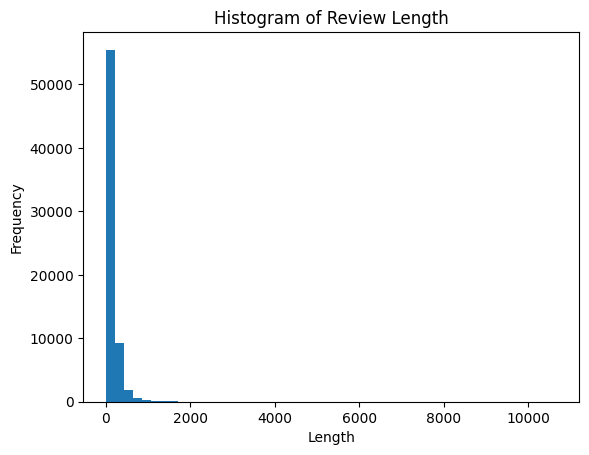

In [34]:
plt.hist(merged['sentiment_length'], bins=50)
plt.title("Histogram of Review Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [35]:
top_reviews = merged['reviews.username'].value_counts().head(10)

In [37]:
positive_rate = merged['Is_Positive'].mean()*100
positive_rate

np.float64(92.03848874219027)